Mathematical Formulation

1.Forward propagation equations:

 a[1] = g(w₁x + b₁)
 a[2] = g(w₂a[1] + b₂)
 ŷ = g(w₃a[2] + b₃)
 where g(·) is the chosen activation.

2. Loss function:
 J = (1/m)* Σ (ŷᵢ - yᵢ)²

3. Gradient descent update rule:
 wₗ ← wₗ - η ∂J/∂wₗ
 bₗ ← bₗ - η ∂J/∂bₗ

 where:
 - l = 1, 2, 3 (layer index)
 - η is the learning rate
 - ∂J/∂wₗ and ∂J/∂bₗ are gradients


**Import Required Libraries**



In [22]:
import numpy as np
import matplotlib.pyplot as plt


Define True Function

In [23]:
def true_function(x):
    return np.exp(-np.sin(x**2) / 2) + x


Generate Data


In [24]:
# Generate 25 samples uniformly in [-10, 10]
x = np.linspace(-10, 10, 25)
y = true_function(x)

# Randomly shuffle and split into training (20) and test (5)
indices = np.arange(len(x))
np.random.seed(42)
np.random.shuffle(indices)

x_train = x[indices[:20]]
y_train = y[indices[:20]]

x_test = x[indices[20:]]
y_test = y[indices[20:]]


Initialize Parameters

In [25]:
np.random.seed(42)

w1, b1 = np.random.randn(), np.random.randn()
w2, b2 = np.random.randn(), np.random.randn()
w3, b3 = np.random.randn(), np.random.randn()

learning_rate = 0.001

def activation(x):
    return np.tanh(x)

def activation_derivative(x):
    return 1 - np.tanh(x)**2


Training Loop

In [26]:
epochs = 10000
loss_history = []

for epoch in range(epochs):
    total_loss = 0

    for xi, yi in zip(x_train, y_train):
        # Forward pass
        z1 = w1 * xi + b1
        a1 = activation(z1)

        z2 = w2 * a1 + b2
        a2 = activation(z2)

        z3 = w3 * a2 + b3
        y_pred = activation(z3)

        # Loss (MSE)
        loss = (y_pred - yi) ** 2
        total_loss += loss

        # Backpropagation
        d_loss = 2 * (y_pred - yi)

        d_z3 = d_loss * activation_derivative(z3)
        d_w3 = d_z3 * a2
        d_b3 = d_z3

        d_a2 = d_z3 * w3
        d_z2 = d_a2 * activation_derivative(z2)
        d_w2 = d_z2 * a1
        d_b2 = d_z2

        d_a1 = d_z2 * w2
        d_z1 = d_a1 * activation_derivative(z1)
        d_w1 = d_z1 * xi
        d_b1 = d_z1

        # Update weights
        w3 -= learning_rate * d_w3
        b3 -= learning_rate * d_b3

        w2 -= learning_rate * d_w2
        b2 -= learning_rate * d_b2

        w1 -= learning_rate * d_w1
        b1 -= learning_rate * d_b1

    loss_history.append(total_loss / len(x_train))


Plot Training Loss

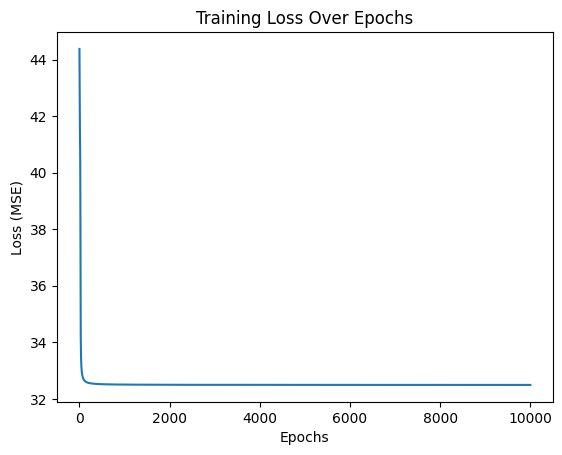

In [27]:
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss Over Epochs')
plt.show()


Predictions & Plot True vs Predicted

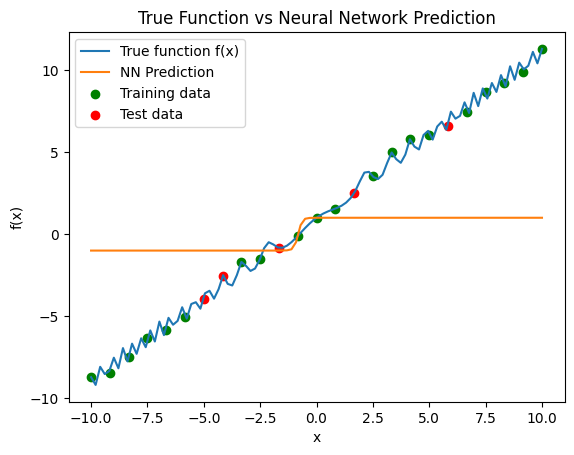

In [28]:
# Train predictions
y_pred_train = []
for xi in x_train:
    a1 = activation(w1 * xi + b1)
    a2 = activation(w2 * a1 + b2)
    y_pred_train.append(activation(w3 * a2 + b3))

# Test predictions
y_pred_test = []
for xi in x_test:
    a1 = activation(w1 * xi + b1)
    a2 = activation(w2 * a1 + b2)
    y_pred_test.append(activation(w3 * a2 + b3))

# Model prediction curve
x_full = np.linspace(-10, 10, 100)
y_true = true_function(x_full)
y_model = [activation(w3 * activation(w2 * activation(w1 * xi + b1) + b2) + b3) for xi in x_full]

plt.plot(x_full, y_true, label='True function f(x)')
plt.plot(x_full, y_model, label='NN Prediction')
plt.scatter(x_train, y_train, color='green', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Test data')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('True Function vs Neural Network Prediction')
plt.show()


Compute and Print Errors

In [29]:
train_error = np.mean((np.array(y_pred_train) - y_train) ** 2)
test_error = np.mean((np.array(y_pred_test) - y_test) ** 2)

print(f"Training Error (MSE): {train_error:.4f}")
print(f"Test Error (MSE): {test_error:.4f}")


Training Error (MSE): 32.4939
Test Error (MSE): 8.9344
